In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] =yf.download(ticker, start = '1995-1-1')['Close']

[*********************100%***********************]  1 of 1 completed


In [3]:
log_returns = np.log(1+data.pct_change())

In [4]:
log_returns.tail()

,PG
Date,
2025-08-22,-0.000378
2025-08-25,-0.016010
2025-08-26,-0.001153
2025-08-27,0.006327
2025-08-28,-0.008381


In [5]:
data.plot(figsize=(10,6));

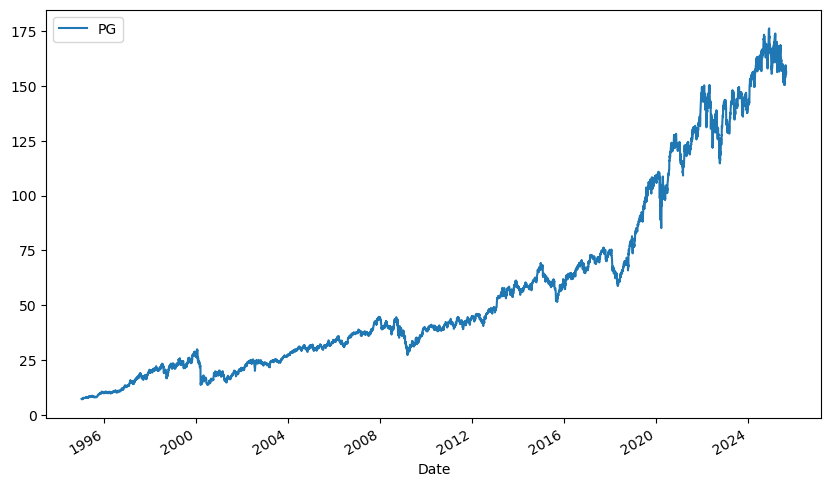

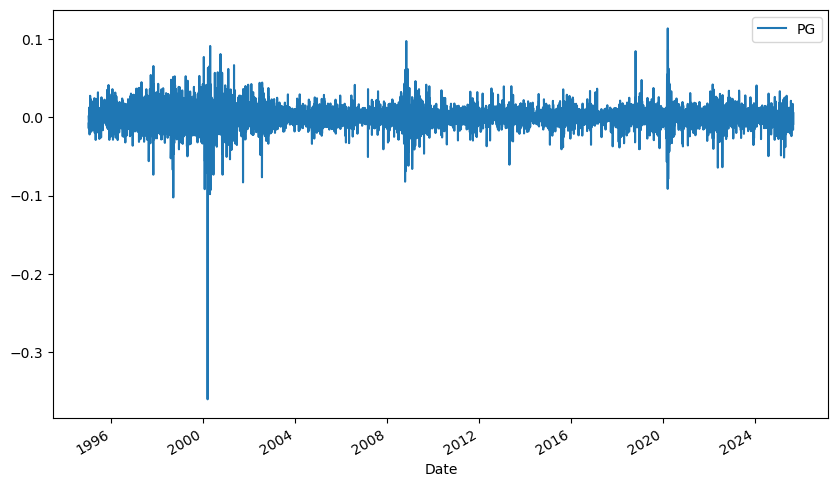

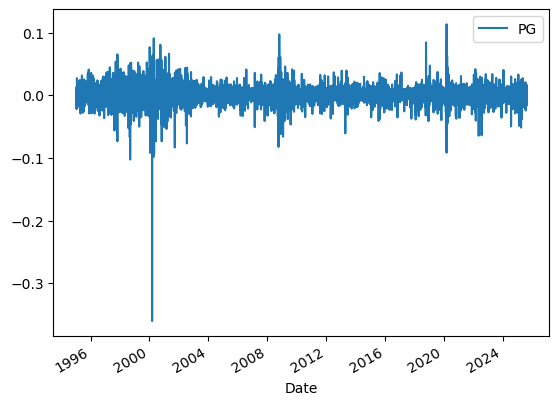

In [6]:
log_returns.plot(figsize = (10,6))
log_returns.plot()
plt.show()

In [7]:
u = log_returns.mean()
u

PG    0.000397
dtype: float64

In [8]:
var = log_returns.var()
var

PG    0.000194
dtype: float64

In [9]:
drift = u - (0.5 * var)
drift

PG    0.0003
dtype: float64

In [10]:
stdev = log_returns.std()
stdev

PG    0.013922
dtype: float64

In [11]:
type(drift)

pandas.core.series.Series

In [12]:
type(stdev)

pandas.core.series.Series

In [13]:
np.array(drift)

array([0.00029968])

In [14]:
drift.values

array([0.00029968])

In [15]:
stdev.values

array([0.01392167])

In [16]:
norm.ppf(0.95)

np.float64(1.6448536269514722)

In [18]:
x = np.random.rand(10,2)
x

array([[0.84818752, 0.14171803],
       [0.73141384, 0.8016431 ],
       [0.57361588, 0.31386546],
       [0.51358618, 0.93967517],
       [0.75822134, 0.07550338],
       [0.82637063, 0.39401494],
       [0.16927681, 0.36273894],
       [0.01306928, 0.64099911],
       [0.90035127, 0.86783261],
       [0.20288382, 0.7351971 ]])

In [19]:
norm.ppf(x)

array([[ 1.02869086, -1.07263244],
       [ 0.61709462,  0.84750483],
       [ 0.18558752, -0.48492308],
       [ 0.03406209,  1.55205254],
       [ 0.70059256, -1.43598448],
       [ 0.93991972, -0.2688698 ],
       [-0.95702702, -0.35114724],
       [-2.22414704,  0.36113066],
       [ 1.28355571,  1.11620408],
       [-0.83136468,  0.62860788]])

In [21]:
z = norm.ppf(np.random.rand(10,2))
z

array([[-0.76009419, -0.23128161],
       [-0.68463216,  0.23129001],
       [ 0.36652312,  0.83660716],
       [ 0.18704944,  0.34301511],
       [-0.57300825, -1.45887985],
       [ 1.12587468, -1.62813133],
       [-0.23066716, -1.10644651],
       [-0.14041655, -0.71236007],
       [ 0.98517042, -0.47037146],
       [-1.38427379,  0.69839816]])

In [22]:
t_intervals = 1000
iterations = 10

In [25]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.99393892, 1.02433064, 0.99937636, ..., 0.98818166, 0.99194124,
        1.00937163],
       [0.98875737, 0.98871553, 1.02229387, ..., 1.01415454, 0.99782187,
        1.01505894],
       [0.99386057, 1.02053344, 1.00400144, ..., 0.98206131, 0.99182368,
        0.96916364],
       ...,
       [1.00544002, 1.01576521, 1.01583993, ..., 0.98880822, 1.00948945,
        0.9812818 ],
       [0.98822377, 0.97334442, 0.99149637, ..., 0.97547738, 0.98860512,
        0.9932008 ],
       [1.00056696, 0.98114077, 1.01431591, ..., 1.01830512, 0.99407971,
        0.99854777]])

In [26]:
S0 = data.iloc[-1]
S0

PG    155.649994
Name: 2025-08-28 00:00:00, dtype: float64

In [27]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
price_list[0] = S0
price_list

array([[155.6499939, 155.6499939, 155.6499939, ..., 155.6499939,
        155.6499939, 155.6499939],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       ...,
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ]])

In [29]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]
price_list

array([[155.6499939 , 155.6499939 , 155.6499939 , ..., 155.6499939 ,
        155.6499939 , 155.6499939 ],
       [153.90007912, 153.89356572, 159.12003448, ..., 157.85314863,
        155.31096733, 157.99391742],
       [152.9552205 , 157.05352961, 159.75674419, ..., 155.02146942,
        154.04109518, 153.12196013],
       ...,
       [106.48621465, 253.29633701, 310.30245222, ..., 458.73380255,
        199.96593319, 184.41562505],
       [105.23220848, 246.54457596, 307.66375346, ..., 447.48444638,
        197.68734532, 183.16174691],
       [105.29187099, 241.89493538, 312.06824025, ..., 455.67570449,
        196.51697804, 182.89575312]])

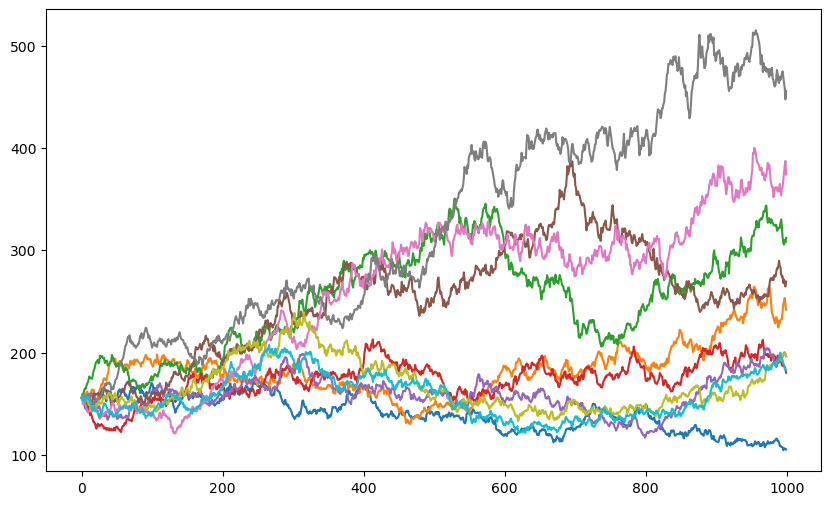

In [34]:
plt.figure(figsize = (10,6))
plt.plot(price_list)
plt.show()